<a href="https://colab.research.google.com/github/Shashwatkumar75/AirlineManagement-django/blob/main/Adaboost_LAB_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/banknotes.txt',names=["variance","skewness","curtosis","entropy","class"])
df.head()
X = df.loc[:, df.columns != 'class']
y = df['class']

In [ ]:
model = Sequential()
model.add(Dense(input_dim = 4, units = 5, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 10, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X,y,batch_size=50, epochs=40)

Epoch 1/40
28/28 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5466
Epoch 2/40
28/28 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5751
Epoch 3/40
28/28 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6800
Epoch 4/40
28/28 [==============================] - 0s 1ms/step - loss: 0.5685 - accuracy: 0.7726
Epoch 5/40
28/28 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8637
Epoch 6/40
28/28 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.9235
Epoch 7/40
28/28 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.9483
Epoch 8/40
28/28 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9628
Epoch 9/40
28/28 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9767
Epoch 10/40
28/28 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.9810
Epoch 11/40
28/28 [

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
l,acc = model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 1.0000


In [ ]:
# ADABOOST W/O K-fold
def adaboost_wo(n):
  abc = AdaBoostClassifier(n_estimators=n,learning_rate=1)
  model = abc.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred = model.predict(X_test)
  print("Accuracy for n_estimators = ",n," : ",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# K-fold
def adaboost(n):
  abc = AdaBoostClassifier(n_estimators=n,learning_rate=1)
  cv = KFold(n_splits=14, random_state=1, shuffle=True)
  score = cross_val_score(abc,X,y,cv=cv,scoring='accuracy')
  all_scores.append(mean(score))

In [ ]:
adaboost_wo(20)
adaboost_wo(40)
adaboost_wo(60)
adaboost_wo(80)
adaboost_wo(100)

Accuracy for n_estimators =  20  :  0.9805825242718447
Accuracy for n_estimators =  40  :  0.9854368932038835
Accuracy for n_estimators =  60  :  0.9951456310679612
Accuracy for n_estimators =  80  :  0.9951456310679612
Accuracy for n_estimators =  100  :  0.9927184466019418


In [ ]:
all_scores = []
adaboost(20)
adaboost(40)
adaboost(60)
adaboost(80)
adaboost(100)

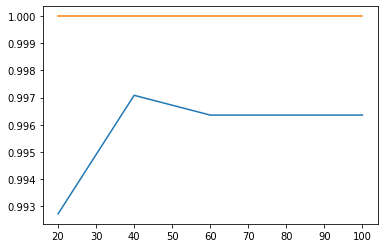

In [ ]:
size = [20,40,60,80,100]
plt.plot(size,all_scores)
plt.plot(size,[acc]*5)